<a href="https://colab.research.google.com/github/joynaomi81/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Load dataset

In [4]:
df = pd.read_csv('/content/drive/MyDrive/data1/creditcard.csv')

# Exploratory Data Analysis

In [5]:
# Check for the first 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df[['Amount', 'Class', 'Time']].describe()

,Amount,Class,Time
count,284807.000000,284807.000000,284807.000000
mean,88.349619,0.001727,94813.859575
std,250.120109,0.041527,47488.145955
min,0.000000,0.000000,0.000000
25%,5.600000,0.000000,54201.500000
50%,22.000000,0.000000,84692.000000
75%,77.165000,0.000000,139320.500000
max,25691.160000,1.000000,172792.000000


In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
# Data shape
df.shape

(284807, 31)

In [10]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
# Check for the last 5 rows
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [12]:
# Check for missing values
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [13]:
null_columns = df.columns[df.isnull().any()]
print("Columns with missing values:", null_columns)

Columns with missing values: Index([], dtype='object')


There are no missing values in any of the columns

In [14]:
null_columns=pd.DataFrame({'Columns':df.isna().sum().index, 'No.Null values':df.isna().sum().values,'Percentage':df.isna().sum().values/df.shape[0]})

In [15]:
null_columns

,Columns,No.Null values,Percentage
0,Time,0,0.0
1,V1,0,0.0
2,V2,0,0.0
3,V3,0,0.0
4,V4,0,0.0
5,V5,0,0.0
6,V6,0,0.0
7,V7,0,0.0
8,V8,0,0.0
9,V9,0,0.0


In [16]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [17]:
df['Class'].unique()

array([0, 1])

In [18]:
# The count of non-fraudulent transactions
nfcount=0

notFraud=df['Class']

for i in range(len(notFraud)):
  if notFraud[i]==0:
    nfcount=nfcount+1
nfcount
# Calculate the percentage of non-fraudulent transactions in the dataset
per_nf=(nfcount/len(notFraud))*100
# Print the total percentage of non-fraudulent transactions
print(' Total percentage of not fraud transactoin in the dataset', per_nf)

 Total percentage of not fraud transactoin in the dataset 99.82725143693798


In [19]:
# The count of non-fraudulent transactions
fcount=0

Fraud=df['Class']
for i in range(len(Fraud)):
   if Fraud[i]==1:
    fcount=fcount+1
fcount
# Calculate the percentage of non-fraudulent transactions in the dataset
per_f=(fcount/len(Fraud))*100
# Print the total percentage of non-fraudulent transactions
print(' Total percentage of fraud transactoin in the dataset', per_f)

 Total percentage of fraud transactoin in the dataset 0.1727485630620034


Exploratory Data Analysis

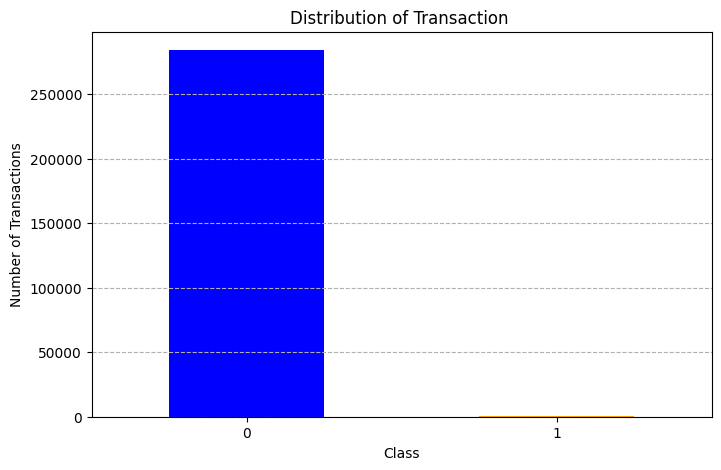

In [33]:
class_counts = df['Class'].value_counts()
plt.figure(figsize=(8, 5))  # The figure size
class_counts.plot(kind='bar', color=['blue', 'orange'])  # Bar plot
plt.title('Distribution of Transaction ')  # Title of the plot
plt.xlabel('Class')  # X-axis label
plt.ylabel('Number of Transactions')  # Y-axis label
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')  # Add gridlines for better readability
plt.show()  # Display the plot

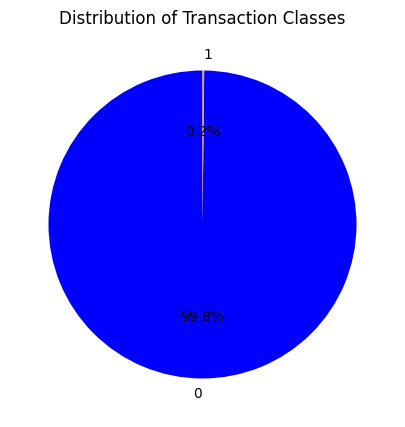

In [31]:
# Plotting the class distribution as a pie chart
plt.figure(figsize=(8, 5))  # Set the figure size
class_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'], startangle=90)  # Pie chart
plt.title('Distribution of Transaction Classes')  # Title of the plot
plt.ylabel('')  # Remove the y-axis label
plt.show()  # Display the plot


In [27]:
# Creating a New DataFrame
plot_data = pd.DataFrame()
plot_data['illegal transaction'] = Fraud
plot_data['legal transaction'] = notFraud
plot_data


,illegal transaction,legal transaction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
284802,0,0
284803,0,0
284804,0,0
284805,0,0


Text(0.5, 1.0, 'Amount VS Class')

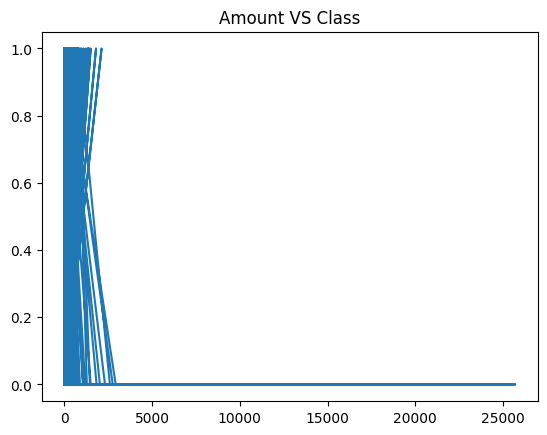

In [34]:
x=df['Amount']
y=df['Class']
plt.plot(x,y)
plt.title('Amount VS Class')

Text(0.5, 1.0, 'Amount VS Class')

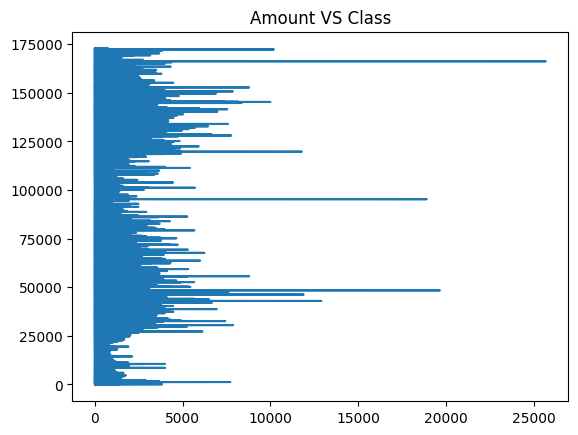

In [35]:
x=df['Amount']
y=df['Time']
plt.plot(x,y)
plt.title('Amount VS Class')

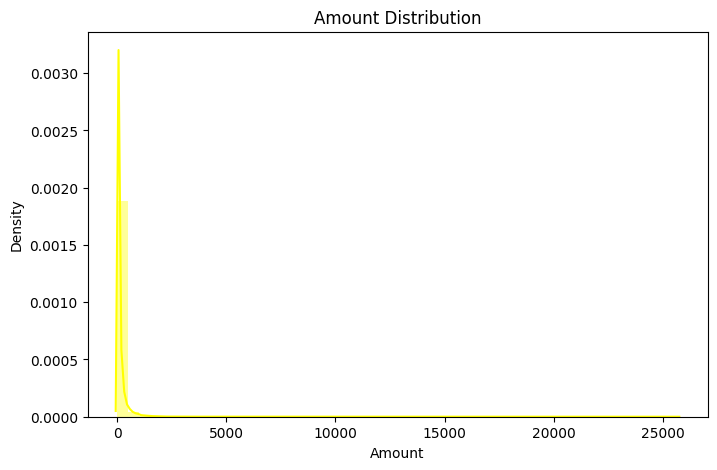

In [39]:
plt.figure(figsize=(8,5))
plt.title('Amount Distribution')
sns.distplot(df['Amount'],color= 'yellow');

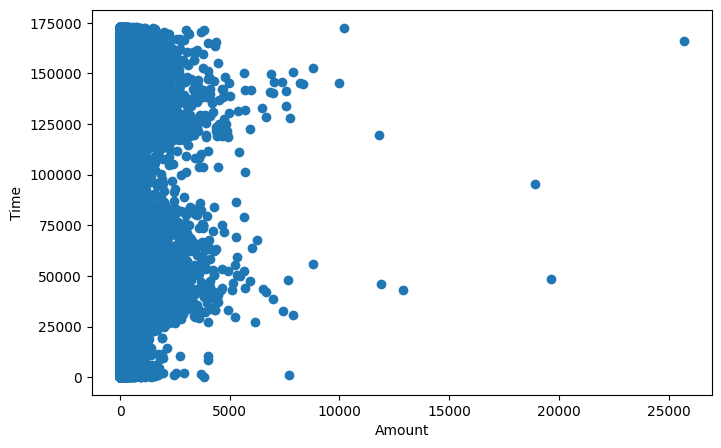

In [40]:
#Scatter plot
fig, ax = plt.subplots(figsize= (8,5))
ax.scatter(df['Amount'], df['Time'])
ax.set_xlabel('Amount')
ax.set_ylabel('Time')
plt.show()

Correlation Matrix

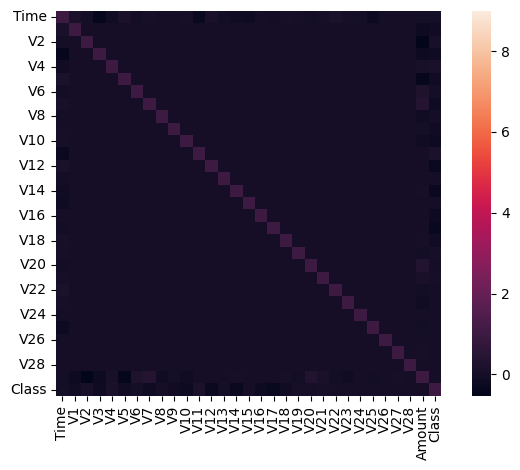

In [41]:
correlation_metrics = df.corr()
fig = plt.figure(figsize = (8,5))
sns.heatmap(correlation_metrics, vmax =9, square=True)
plt.show()

# **Train** **Test** **Split**

In [43]:
x=df.drop(['Class'], axis = 1)
y=df['Class']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

# Logistic Regression

In [44]:
lr= LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [45]:
y_pred = lr.predict(x_test)
accuracy = lr.score(x_test, y_test)

In [46]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[56829    35]
 [   43    55]]


56829 True Negatives: The model correctly identified 56829 transactions as non-fraudulent.

35 False Positives: The model incorrectly identified 35 non-fraudulent transactions as fraudulent.

43 False Negatives: The model incorrectly identified 43 fraudulent transactions as non-fraudulent.

55 True Positives: The model correctly identified 55 fraudulent transactions.

In [47]:
print('Accuracy score of lr model', accuracy*100)

Accuracy score of lr model 99.86306660580738


In [48]:
# Classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.61      0.56      0.59        98

    accuracy                           1.00     56962
   macro avg       0.81      0.78      0.79     56962
weighted avg       1.00      1.00      1.00     56962



# Naive Bayes Model

In [55]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

X = df.drop('Class', axis=1)
y = df['Class']  # Target (the 'Class' column contains labels: 0 for non-fraud, 1 for fraud)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 99.30479969102208

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85307
           1       0.14      0.66      0.23       136

    accuracy                           0.99     85443
   macro avg       0.57      0.83      0.61     85443
weighted avg       1.00      0.99      1.00     85443


Confusion Matrix:
 [[84759   548]
 [   46    90]]


# K-Nearest Neighbors (KNN) Classifier

In [56]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier

X = df.drop('Class', axis=1)
y = df['Class']  # Target (the 'Class' column contains labels: 0 for non-fraud, 1 for fraud)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


k = 7
knn_model = KNeighborsClassifier(n_neighbors=k)

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 99.84434067155881

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       1.00      0.02      0.04       136

    accuracy                           1.00     85443
   macro avg       1.00      0.51      0.52     85443
weighted avg       1.00      1.00      1.00     85443


Confusion Matrix:
 [[85307     0]
 [  133     3]]


# Decision Tree Classifier

In [57]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier

X = df.drop('Class', axis=1)
y = df['Class']  # Target (the 'Class' column contains labels: 0 for non-fraud, 1 for fraud)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 99.90871107053826

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.70      0.75      0.72       136

    accuracy                           1.00     85443
   macro avg       0.85      0.87      0.86     85443
weighted avg       1.00      1.00      1.00     85443


Confusion Matrix:
 [[85263    44]
 [   34   102]]


In [68]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop('Class', axis=1)
y = df['Class']  # Target (the 'Class' column contains labels: 0 for non-fraud, 1 for fraud)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=7),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Train models and store accuracies
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy * 100  # Convert to percentage


In [69]:
# Print the accuracy of each model
print("Model Accuracies:")
for name, accuracy in accuracies.items():
    print(f"{name}: {accuracy:.2f}%")


Model Accuracies:
Logistic Regression: 99.87%
KNN: 99.84%
Naive Bayes: 99.30%
Decision Tree: 99.91%


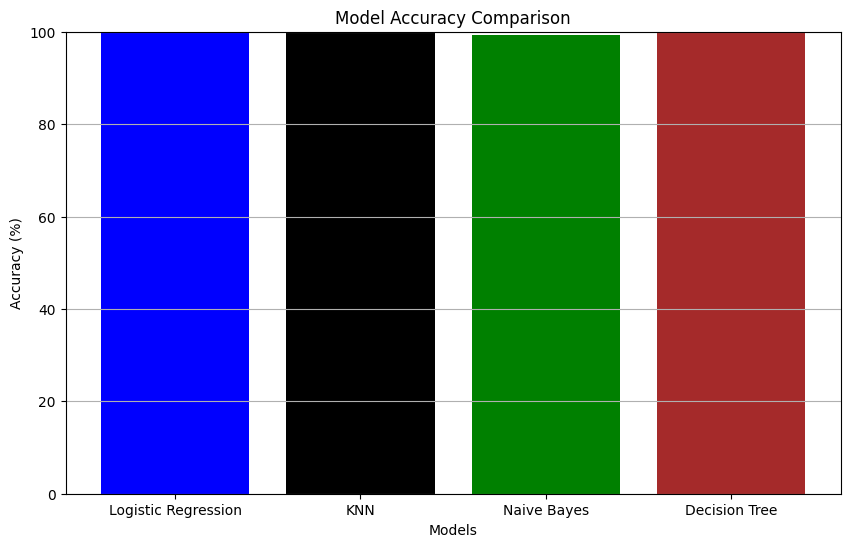

In [67]:
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])

# Plotting the accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'], color=['blue', 'black', 'green', 'brown'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()
